# Introduction

Mathematical fractals are specific functions that gernerate shapes with chaotic details at extremely small and arbitrary scales. Another popular definition is a shape with infinite perimiter but finite area, meaning the more closely one zooms in on the curve defining the area, the more detailed it becomes, usually with a recognizable pattern or repitition. 

This Jupyter Notebook contains three interactive examples of famous fracrals. The first of which is the Sierpinski Triangle, a self-similar fractal that consists of subdivisions of equilateral triangles named after mathematician Waclaw Sierpinski. The second is the Mandelbrot set (named after Benoit B. Mandelbrot), a plot that contains all the points that converge and describes the rate of divergence of points in the complex plane when iterated on the function Z_n = (Z_n-1)^2+C, where C is the starting point in the complex plane and Z_0 = 0+0i. The set describes the rate at which that function either converges into a repeating pattern, or diverges off to infinity. Depending on the number of iterations it takes to converge or diverge, the point is colored differently. The final simulation is that of the Julia Set, a ratio of complex functions (in this case the ratio analizes to the mandelbrot equation, the most famous relation of the two fractals) with an added complex constant C.The Julia set derrives its name from Gaston Julia, a mentor to Benoit Mandelbrot. The two were known as "fractalists" for their contributions to the field. The main difference between the latter two is that the Julia set takes a non-zero value for Z_0 and then adds its constant C. The same principle is applied where converging values are colored a certain way, and diverging values are colored based on their rate of divergence (i.e. how many iterations are required to approach infinity.)

# Motivations and Background
My motivations for this project stem from some outside reading I did during the pandemic. I went to a used book store and picked up a book called "Fractals and Chaos," a summaray of a conference from the early 90s edited by Crilly, Earnshaw, and Jones. The book consists of two main sections, obvious from the title, but relates them throughout. It covers a history of fractal mathematics, the Mandelbrot and Julia sets themselves, as well as use cases for fractal simulations, with chapter titles like "Cities as Fractals: Simulating Growth and Form", "Modelling Growth Forms of Sponges with Fractal Techniques", and "Neural networks, Learning Automata, and Iterated Function Systems". It was obvious to me that I should take something from this wildly interesting book and do something for this class with it. 

The book contained images from early 90s computers generating fantastic images of plant and city growth using iterative fractals (and even contained some psuedocode for the more complex neural networks chapters). The first few chapters were the only ones I really grasped, though, covering early fractals such as the Sierpinski Triangle (and Sierpinski Carpet, which uses squares rather than triangles), and the work of David Hilbert, famous for the hilbert curve which is now used in certain compression algorithms and rendering the IPv4 space. Eventually I muscled my way through the techincal jargon and mathematics notation and got to the chapter on the Mandelbrot and Julia Sets, which described it in a way that piqued my interest. The author of this section, Dominnic E. Reeve, spoke about the beauty of the mathematics and the way it can describe seemingly chaotic natrual developments like branches on a tree or growth of sponges. I tried to take the passion and graduate level mathematics and create something for this class. 

The foundation of understanding the simple early fractals from Sierpinski and Hilbert, as well as Mandelbrot's and Julia's mathematical discoveries/descriptions, seemed vital to understanding more complex and accurate natrual process simultions. The later chapters about simulating the growth of cities and sea sponges are the natrual next step to these fractals. And in combination with the second half of the book about chaos, these to mathematical concepts about reptitition and unpredictability combine in a beautiful way to be able to simulate these natrual phenomena with an uncanny level of accuracy. While the Mandelbrot and Julia sets themselves are not much more than a pretty visualization of an abstract mathematical concept, the novel applications of similar processes with slightly different function definitions and starting conditions can lead to an almost perfect prediction of how cityscapes will develop through time, or fungus will spread throughout a forrest floor.

Now, I am not a graduate level mathematician, but it also is no longer 1990, so I think I could meet the simulations described in the book somewhere in the middle with modern simulation and visualization technolgy. The examples from the book were helpful in understanding conceptually, but the syntax used was obtuse and out-of-date. 

I think my final product is nothing to scoff at but could definitley be improved. I rendered an interactive Sierpinski Triangle in Vpython, using a slider to change the number of subdivisions, but I rendered the Mandelbrot and Julia sets in matplotlib, due to their definition being in the 2-D complex plane and the three dimensions of Vpython would not be necessary and computational intensity lent itself better to limiting to two dimensions. Since these simulations are more mathematical than physical, the influence diagrams essentially boil down to the equations that describe them. In terms of simulation time, these simulations are more of a toy for the user to understand mathematical models, than representations of a real world system, at least at this stage. The Sierpinski triangle updates the visual anytime the user changes the number of subdivisions they wish to see. The Mandelbrot and Julia sets are rendered in the background after getting user input and then display a static image depending on that input, and then are ready to take in another round of input, so these aren't "real time" simulations, although in the future that would be a goal of mine. As far as numerical techinques are concerned, I mostly used Newtonian integration within my recursive functions. Z_n is caluclated using Z_n-1 for the complex sets, which I applied from the early real time simulations where the velocity at the next timestep is calculated based on current acceleration and previous velocity, or kinetic energy in the system is calculated based on previous energy and current velocity.

# Sierpinski's Triangle Simulation
For the Sierpinski Triangle simulation, the number of subdivisions ranges from 1 to 10 because 0 is just a triangle, and going above 10 with the approach that I took causes the simulation to lag and can be too intense on my system. Whenever the slider is changed, the simulation changes all objects visibility to False, and then recursively renders the triangles for the number of subdivisions selected by the slider. Each recursive call finds the midpoint of each side of the triangle and draws 3 new triangles using those midpoints and the previous iterations points. The traingles start out blue but due to some interaction with vertices and recursion, the color seems to only be at the outermost verteces. The mathematics involved in the Sierpinski triangle are fairly simple geometric concepts, such as midpoints and similarity, and are easily calculable with recursion for the desired level of subdivisions.

### Future Work with Sierpinski's Triangle
Other than a few bug fixes with color and optimizations that could be made with managing VPyhton objects, there isn't much future work that could be done to improve this simulation much. I could try other simple geometric fractals such as Sierpinski's Carpet, or a Hilbert's Space filling curve.

In [1]:
from vpython import *

scene = canvas()
# set up the scene
scene.background = color.black
scene.width = 800
scene.height = 800

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
def sierpinski(level, corner_points):
    if level == 0:
        triangle0 = triangle(vs=corner_points, color=color.blue)
    else:
        # calculate the midpoints of each edge of the triangle
        abPos = (corner_points[0].pos + corner_points[1].pos) / 2
        ab = vertex(pos = abPos)
        
        bcPos = (corner_points[1].pos + corner_points[2].pos) / 2
        bc = vertex(pos = bcPos)
        
        caPos = (corner_points[2].pos + corner_points[0].pos) / 2
        ca = vertex(pos = caPos)

        # recursively call the function on the three new triangles
        sierpinski(level-1, [corner_points[0], ab, ca])
        sierpinski(level-1, [corner_points[1], bc, ab])
        sierpinski(level-1, [corner_points[2], ca, bc])

def S(s):
    for obj in scene.objects:
        obj.visible = False
    sInt = int(s.value)
    sierpinski(sInt, corner_points)
    

slider( bind=S, min = 1, max = 10, step = 1, value = 4 )
scene.append_to_caption('\n\n')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# create the initial equilateral triangle
a = vertex(pos = vector(0, 1, 0),color = color.blue)
b = vertex(pos = vector(-0.86, -0.5, 0), color = color.blue)
c = vertex(pos = vector(0.86, -0.5, 0), color = color.blue)
corner_points = [a,b,c]
triangleTop = triangle(vs=corner_points)

# generate the Sierpinski triangle
sierpinski(4, corner_points)

# Mandelbrot Set Simulation
As I described above, the Mandelbrot set consists of the points, C, in the complex plane that converge/cycle when iterated on in the function:

Z_n = (Z_n-1)^2 + C

where Z_0 = 0+0i.

Those not in the set, i.e. diverge/approach infinity, are what make the simulation and visualization interesting. Those not in the set diverge off to infinity, but the rate at which they diverge determines what color that point gets. The general rule of thumb is that if the real value of Z_n > 2, it will diverge, as the squared complex (i.e. negative) values will be overshadowed by the squared real values.

In the simulation, the user can input the values for minimum and maximum x and y values, corresponding to the real and imaginary axes, respectively. Any values can be input, as long as min < max for both x and y. Below the code is a table of example windowing coordinates one can input to see famous regions of the mandelbrot set, and a link to an online simulation much better than my own.

### Future Work with The Mandelbrot Set
Future work with this simulation would take a lot of inspiration from readily available visualizers online. The first would be be changing from text input to mouse input, with either mouse wheel acting as a zoom in/zoom out or using a click and drag function to lasso a smaller window. The text input for the min and max values for each axes is not very intuitive if one isn't very familiar with this fractal. I could also implement some optimizations in the mandelbrot function to do more iterations. Some of these optimizations would be breaking quicker to save time when a value converges and then being able to iterate deeper past 100 or 500 iterations as I have tried here. Going past 500 iterations cause the simulation to take upwards of 3-5 minutes to generate an image, unlike some better simulations that I referecned online.

### Simulation Instructions
The block below this is the simulation for The Mandelbrot Set. The block below that contains a table of input values as well as a link to the reference visualizer I used for verification.

Enter the minimum x value: -2
Enter the maximum x value: 1
Enter the minimum y value: -1
Enter the maximum y value: 1


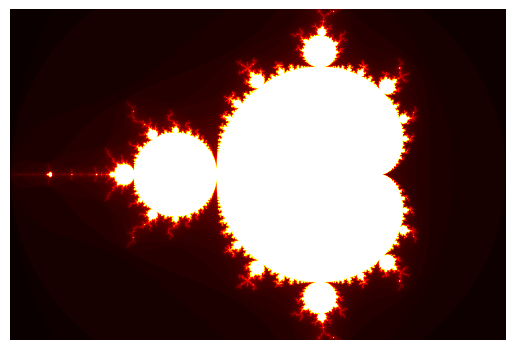

Enter the minimum x value: -0.18
Enter the maximum x value: -0.17
Enter the minimum y value: 1.07
Enter the maximum y value: 1.08


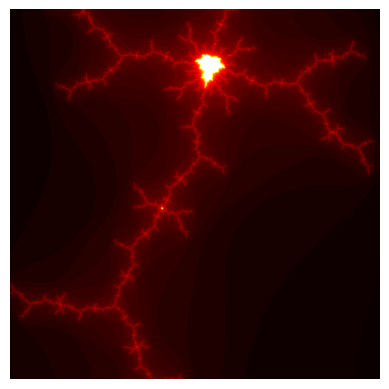

KeyboardInterrupt: Interrupted by user

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the complex function to iterate
def mandelbrot(c):
    z = 0
    #100 iterations to check for convergence or divergence
    for i in range(100):
        z = z**2 + c
        if abs(z) > 2:
            return i
    return 100
def redraw():
    # Get user input for the plot limits
    x_min = float(input("Enter the minimum x value: "))
    x_max = float(input("Enter the maximum x value: "))
    y_min = float(input("Enter the minimum y value: "))
    y_max = float(input("Enter the maximum y value: "))

    # Set up the grid of complex numbers to iterate over
    x_vals = np.linspace(x_min, x_max, 1000)
    y_vals = np.linspace(y_min, y_max, 1000)
    complex_grid = np.meshgrid(x_vals, y_vals)
    c_values = complex_grid[0] + 1j * complex_grid[1]

    # Iterate the function over the grid and generate a color map
    mandelbrot_set = np.zeros_like(c_values, dtype=np.float64)
    for i in range(c_values.shape[0]):
        for j in range(c_values.shape[1]):
            mandelbrot_set[i,j] = mandelbrot(c_values[i,j])
    color_map = plt.imshow(mandelbrot_set, cmap='hot', extent=[x_min, x_max, y_min, y_max])

    # Display the image
    plt.axis('off')
    plt.show()

#simulation loop, allows for entering new domain and range values
while True:
    redraw()

# Verification with some famous areas of the mandelbrot set
I compared my divergence speed heatmap to this one online: https://mandel.gart.nz/#/


| Region Name | Min X | Max X | Min Y | Max Y |
| --- | --- | --- | --- | --- |
| Whole Set | -2 | 1 | -1 | 1 |
| Smaller Set down Real Axis | -1.865 | -1.860 | -0.001 | 0.001 |
| Elephant Valley | 0.28 | 0.30 | 0 | 0.02 |
| Seahorse Valley | -0.76 | -0.74 | 0.08 | 0.12 |
| Tendril | -0.18 | -0.17 | 1.07 | 1.08 |


Although my simulation does not have the fidelity or ease-of-use that the one linked does, the shapes at each of these coordinate areas is exactly the same, with minor changes in the coloring scheme due to number of iterations and precision of values. The thing about the mandelbrot set is that two values that are only 1e-9 apart in any direction could have drastically different values for rate of divergence. Having similar shapes to that of the same areas as verified online simulations is all I could ask for in regards to a time crunched implementation in the last few weeks of the semester.

# Julia Set Simulation

A Julia Set is a set of points that converge using the mandelbrot set but varying the value for Z_0. Varying this initial value of Z and then iterating on surrounding points, gives the relative image of what is going on at that point in the Mandelbrot set. A fun fact about Julia sets is that if you take a number of Julia Sets that span the Mandelbrot set and overlay them, the resulting image will reconstruct the Mandelbrot set from the Julia sets. https://en.wikipedia.org/wiki/Julia_set#/media/File:Julia_Mandelbrot_Relationship.png


For the Julia Set simulation, I have hard coded the range of -2 to 2 for both the real and imaginary portions of the complex plane. This window is large enough to encompass the whole Mandelbrot set so that any of those Julia sets could be visualized. The code for taking in min/max x/y coordinates is still below but commented out. Exploring different and smaller windows leads to the Julia sets that can reconstruct the mandelbrot.

### Future Work
I limied the window to the square of -2 to 2 due to the same computation issues that stressed the Mandelbrot Set simulation. With the inefficiencies that add up when using differnt python libraries, combinied with unideal break points at iterating on certain points to check for convergence, the simulation starts chugging extra slowly when not within this window. I would love to spend some time with it in order to hammer out those inefficiencies, potentially recreating it in a more efficient language such as C or C++ to get the computation time down. I would also like to use different color schemes, similar to those liked with the verification table below, so that the regions that diverge quickly vs those that take many iterations are more discernable.

### Simulation Instructions
The block below this is the simulation for Julia Sets. The block below that contains a table of input values as well as a link to the reference images I used for verification.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iterationRange = 50

# Define the complex function to iterate
def julia(z, c):
    # 100 iterations to check for convergence or divergence
    for i in range(iterationRange):
        z = z**2 + c
        if abs(z) > 2:
            return i
    return iterationRange

def redraw():
    # Get user input for the plot limits and constant complex number 'c'
#     x_min = float(input("Enter the minimum x value: "))
#     x_max = float(input("Enter the maximum x value: "))
#     y_min = float(input("Enter the minimum y value: "))
#     y_max = float(input("Enter the maximum y value: "))
    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2
    real_c = float(input("Enter the real part of c: "))
    imag_c = float(input("Enter the imaginary part of c: "))

    # Set up the grid of complex numbers to iterate over
    x_vals = np.linspace(x_min, x_max, 1000)
    y_vals = np.linspace(y_min, y_max, 1000)
    complex_grid = np.meshgrid(x_vals, y_vals)
    z_values = complex_grid[0] + 1j * complex_grid[1]

    # Iterate the function over the grid and generate a color map
    julia_set = np.zeros_like(z_values, dtype=np.float64)
    for i in range(z_values.shape[0]):
        for j in range(z_values.shape[1]):
            julia_set[i,j] = julia(z_values[i,j], complex(real_c, imag_c))
    color_map = plt.imshow(julia_set, cmap='gist_rainbow', extent=[x_min, x_max, y_min, y_max])

    # Display the image
    plt.axis('off')
    plt.show()

#simulation loop, allows for entering new domain and range values and c values
while True:
    redraw()

# Verificaiton of Julia Set with Test Inputs
The values used here are from the following website with its own visuals: https://mathworld.wolfram.com/JuliaSet.html

Although the shapes are all the same (mirrored but the same), their colormapping for rate of divergence is different and results in a different coloring. I spoke about this in my future work section, but was limited with the options for colormaps that are provided with matplotlib.

| C | i | Name |
| --- | --- | --- |
| -2 | 0 | Non-Fractal |
| -1 | 0 | Fractal, negative real, 0 imaginary |
| 0 | 0 | Non-Fracal, c = 0 |
| 1 | 0 | Fractal, c = 1 |
| 2 | 0 | Fractal, c = 2 |
| 3 | 0 | Fractal, c = 3 |
| 0 | 1 | Dendrite Fractal, c = i |
| -0.123 | 0.745 | Douady's Rabbit Fractal |
| -0.75 | 0 | San Marco Fractal |
| -0.391 | -0.587 | Siegel Disk Fractal |

# Evaluation
The limitations of my models come from inefficiencies with iterations and lack of interactability. 

In the VPython model for the Sierpinski Triangle, every time the slider is moved, the previous triangles are not deleted but rather their 'visible' flag is turned to False. This results in the scene getting accruing latency with every edit of the subdivisions variable. With more time I think I could have found a solution that deletes the objects from the scene, rather than hide them, so that each time the slider is moved the number of objects doesn't necessarily increase.

In the matplotlib models of the Mandelbrot and Julia set, I was essentially limited to less than 500 iterations when checking for convergence, and limited to 1000 by 1000 values when creating the visualization. Each time the window is defined, or starting C value given, the simulation would linspace within that window and then only do 100 iterations when checking for convergence. Higher fidelity models allow for more iterations when checking convergence and more discrete values for the window that the user is looking at. The example visualizer I linked with the Mandelbrot set is a good example of a more efficient product also leading to a more useful one. It displays how quickly the area was rendered, as well as changing the rendering when using the mouse to zoom in or out.

Given these limitaitons, I think my simulations would best be used by someone like myself, who has an interest in the mathematics behind these fractals. Like I described in my motivation section, the book that introduced me to these concepts is a summary of graduate level mathematical concepts. Although I have a very good understanding of these pure math parts, I still struggle to get through the techincal jargon and high level math notation used in the sections such as "Cities as Fractals: Simulating Growth and Form " and "Modelling Growth Forms of Sponges with Fractal Techniques." I think if a graduate student going into the field of fractals could use a simulation such as mine to get under the hood and change the parameters around to see what goes on with these complex functions. Being able to change the window being looked at and the fidelity at which the render is created, allows for a hands on experience with the "under the hood" calculations that go on when creating these images. I think the online visualizers that I used for verification are just that, visualizers, whereas this allows for someone who's trained in math to get an better idea of the pure math, before getting into the applications in describing natural growths of cities, plants, and other natural phenomena using these recursive and tessalating fucntions.

Some of the challenges with this project came in understanding the mathematics, as I have already touched on, as well as some of the engineering decisions that had to be made. I started with the simplest part, the Sierpinski triangle, and was able to get a working, although inefficient, model in Vpython. My first approach at the more complex fractals was in vpython, and I ran into a whole host of timeout, overflow, and runtime errors, even though I was certain my recursion and calculations were accurate to the expected model. At a certain point, I had to throw out almost all of my progress, other than the purely mathematical convergence calcuation functions, in order to recreate the functions in a format that could be visualized. I also had to spend hours on the matplotlib API documentation to hammer out the bugs that arose from my lack of experiece with the more advanced fucntionality like colormapping.

As far as other approaches, I think the nature of the mathematical models are inherently Newtonian, with the definition of Z_n being based off Z_n-1. Euler integration techiniques where next steps are calculated and then propogated back break the definition of these sets.

# Conclusion
Overall, I learned a lot about mathematical modelling and simulation with this project. I have since revisited the "Fractals and Chaos" book by Crilly, Earnshaw, and Jones, and have an entierly new understanding of the more basic topics, and at least a surface level undertanding of the more complex ones. I also have a newfound respect for those that presented their findings at the conference that the book summarizes. Those folks created simulations on par with my own, with more mathematical prowess, and less technological resources. I can't even imagine the pain that it was to visualize these things on early 90s hardware. As far as future work, I described each briefly in their own section, but overall I would like to wrap this whole project up on a webpage one day in order to allow other people to see what I made, tinker around with it, and gain some appreciation like I have. This class has been invaluable and I wish there were more like it.

# References
Crilly, A. J., Earnshaw, R. A., & Jones, H. (1991). Fractals and chaos. Springer-Verlag. 
https://mandel.gart.nz/#/
https://mathworld.wolfram.com/JuliaSet.html